## Nome: Felipe Silva Loschi
## Matricula: 601

---

## **Atividade 5** - Localização e Refinamento de Raízes

## Funções Auxiliares

In [35]:
# Plotar gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Analise de dados
import numpy as np
import pandas as pd

### Função e Derivada da Função

In [36]:
def target_function(x):
    return x**3 - 2*x**2 - 3*x + 1

def derivative_function(x):
    return 3*x**2 - 4*x - 3

intervalo = [-5, 5]

### Método de Newton-Raphson

In [37]:
# implementa o processo de iteração usando a fórmula de Newton-Raphson
def newton_raphson_method(initial_guess, tolerance, max_iterations):
    """
    Aplica o método de Newton–Raphson para aproximar uma raiz de target_function(x).

    :param initial_guess: chute inicial x0
    :param tolerance: tolerância para parada (critério |f(x)| < tolerance)
    :param max_iterations: número máximo de iterações
    :return: raiz aproximada (float), número de iterações (int)
    """
    x_n = initial_guess
    for iteration in range(max_iterations):
        f_x = target_function(x_n)
        f_prime_x = derivative_function(x_n)

        # Evitar divisão por zero
        if f_prime_x == 0:
            print("A derivada é zero. Não é possível prosseguir.")
            return x_n, iteration + 1 # Retornar a aproximação atual e a contagem de iterações

        # Verificar convergência com base na tolerância
        if abs(f_x) < tolerance:
            return x_n, iteration + 1 # Retornar a raiz e a contagem de iterações

        x_n = x_n - f_x / f_prime_x

    # Se o número máximo de iterações for atingido sem convergência
    print("Número máximo de iterações atingido sem alcançar a tolerância desejada.")
    return x_n, max_iterations

---

## Parte Prática
No Inatel, os alunos de engenharia muitas vezes precisam analisar funções matemáticas para resolver problemas práticos, como verificar o comportamento de circuitos, sinais ou sistemas de controle. Encontrar as raízes de uma função é um passo importante nesses contextos, pois pode indicar pontos de equilíbrio, frequências de ressonância ou condições de operação de um sistema.

Seja a função
$f(x) = x^3 – 2x^2 – 3x + 1$.

Sabendo que esta função possui raízes no intervalo [−5,5], utilize o TEU com espaçamento de 1 para localizar os intervalos que contêm cada uma das raízes reais da função.

In [38]:
df = pd.DataFrame(columns=["x", "f(x)", "f1(x)"])
for x in range(intervalo[0], intervalo[1]+1):
    df = pd.concat([df, pd.DataFrame({"x": [x], "f(x)": [target_function(x)], "f1(x)": [derivative_function(x)]})]).reset_index(drop=True)

print(df.to_string(index=False))

 x f(x) f1(x)
-5 -159    92
-4  -83    61
-3  -35    36
-2   -9    17
-1    1     4
 0    1    -3
 1   -3    -4
 2   -5     1
 3    1    12
 4   21    29
 5   61    52


1. Utilizando o Teorema do Valor Intermediário (TEU) e espaçamento unitário no intervalo [−5,5], determine os subintervalos que contêm cada uma das raízes reais da função.

In [39]:
def mudou_sinal(fa, fb):
    # TEU: existe raiz em [a,b] se f é contínua e fa*fb < 0
    return fa * fb < 0

intervalos = []
chutes_iniciais = []
for x in range(intervalo[0], intervalo[1]+1):
    # 1. Verificar se há mudança de sinal na função
    # 2. Escolher os chutes iniciais para Newton-Raphson (utilize o ponto médio do intervalo)
    x_n, x_n1 = target_function(x), target_function(x+1)
    y_n, y_n1 = derivative_function(x), derivative_function(x+1)
    if mudou_sinal(x_n, x_n1):
        intervalos.append((x, x+1))
        chutes_iniciais.append((x + (x+1))/2)

print(f"Intervalos: {intervalos}")
print(f"Chutes Iniciais: {chutes_iniciais}")

Intervalos: [(-2, -1), (0, 1), (2, 3)]
Chutes Iniciais: [-1.5, 0.5, 2.5]


2. Identifique visualmente os pontos onde a curva cruza o eixo x e compare com os intervalos obtidos pelo TEU.

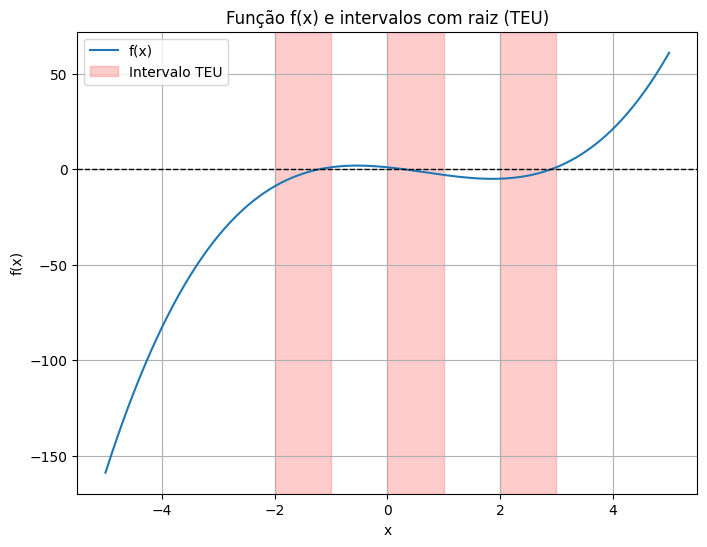

In [40]:
# Gera pontos para o gráfico
x_vals = np.linspace(-5, 5, 500)
y_vals = target_function(x_vals)

# Intervalos do TEU
intervalos = [(-2, -1), (0, 1), (2, 3)]

# Plot
plt.figure(figsize=(8,6))
sns.lineplot(x=x_vals, y=y_vals, label="f(x)")

# Eixo x
plt.axhline(0, color="black", linestyle="--", linewidth=1)

# Marca os intervalos encontrados pelo TEU
for a, b in intervalos:
    plt.axvspan(a, b, color="red", alpha=0.2, label="Intervalo TEU" if a == -2 else "")

plt.title("Função f(x) e intervalos com raiz (TEU)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

3. Implemente o Método de Newton-Raphson nos pontos iniciais obtidos.

In [41]:
tolerancia = 1e-9
iteracao_max = 250

for chute_inicial in chutes_iniciais:
    print(f"Chute Inicial: {chute_inicial}")
    repostas, iteracoes = newton_raphson_method(chute_inicial, tolerancia, iteracao_max)
    print(f"Raizes: {repostas}")
    print(f"Iterações: {iteracoes}")

Chute Inicial: -1.5
Raizes: -1.1986912435638974
Iterações: 5
Chute Inicial: 0.5
Raizes: 0.2864620651145184
Iterações: 4
Chute Inicial: 2.5
Raizes: 2.912229178484397
Iterações: 6


4. Implemente o Método de Bissecção

In [42]:
def bissecao(a, b, tol=1e-9, max_iter=250):
    fa, fb = target_function(a), target_function(b)

    for i in range(max_iter):
        m = (a + b) / 2
        fm = target_function(m)

        # critério de parada
        if abs(fm) < tol or (b - a) / 2 < tol:
            return m, i+1  # raiz aproximada e nº de iterações

        #subintervalo
        if fa * fm < 0:
            b, fb = m, fm
        else:
            a, fa = m, fm

    print("Número máximo de iterações atingido.")
    return (a + b) / 2, max_iter

for intervalo in intervalos:
    a, b = intervalo
    print(f"Intervalo: {intervalo}")
    raiz, iteracoes = bissecao(a, b)
    print(f"Raiz: {raiz}")

Intervalo: (-2, -1)
Raiz: -1.198691244237125
Intervalo: (0, 1)
Raiz: 0.28646206483244896
Intervalo: (2, 3)
Raiz: 2.9122291784733534


---
## Parte Teórica

1. Quais são as limitações do uso do TEU para encontrar raízes de funções?

Resposta: O TEU garante que há pelo menos uma raíz dentro do intervalo, mas pode haver mais de uma raiz dependendo do intervalo e com o TEU não conseguimos necessariamente detectar isso. Além disso, o TEU também só detecta se o intervalo mudar de sinal, em funções pares em que delta é zero e a função toca o eixo apenas uma vez, sem alterar seu sinal, o TEU não seria capaz de detectar a raíz.

2. Qual é a principal vantagem do método da bissecção em relação a outros métodos numéricos?

Resposta: A principal vantagem é que se a função é contínua no intervalo e existe mudança de sinal, o método da bisseção sempre converge para uma raiz dentro do intervalo.

3. Em quais situações o método de Newton-Raphson pode falhar ou não convergir?

Resposta:


*   Funções descontínuas
*   Chute inicial muito longe
*   Funções com oscilações
*   Se a derivada for zero ou próxima

